<a href="https://colab.research.google.com/github/eliot28/desafioLatam/blob/main/tutoria_7_ML_procesamiento_datos_g80.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

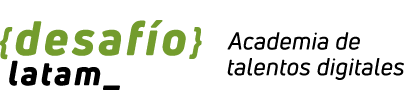

#<center><font color = 'green'>Preprocesamiento de datos</font></center>

##Entendimiento y preparación de datos

In [37]:
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy.stats import chi2
from scipy.stats import chi2_contingency

import scipy.stats as stats

### Detección de Outliers

#### 1. IQR

In [38]:
# Cargar un DataFrame de ejemplo desde Seaborn
df = sns.load_dataset('car_crashes')
print(df.shape)
df.head()

(51, 8)


,total,speeding,alcohol,not_distracted,no_previous,ins_premium,ins_losses,abbrev
0,18.8,7.332,5.640,18.048,15.040,784.55,145.08,AL
1,18.1,7.421,4.525,16.290,17.014,1053.48,133.93,AK
2,18.6,6.510,5.208,15.624,17.856,899.47,110.35,AZ
3,22.4,4.032,5.824,21.056,21.280,827.34,142.39,AR
4,12.0,4.200,3.360,10.920,10.680,878.41,165.63,CA


In [3]:
def plot_boxplot_with_outliers(data, column_name, outlier_color='red', factor=1.5):
    # Calcular los estadísticos clave
    Q1 = data[column_name].quantile(0.25)
    Q3 = data[column_name].quantile(0.75)
    IQR = Q3 - Q1

    # Calcular los límites para los valores atípicos
    lower_bound = Q1 - factor * IQR
    upper_bound = Q3 + factor * IQR


    # Crear un gráfico de diagrama de caja (boxplot)
    plt.figure(figsize=(8,10))
    sns.boxplot(y=data[column_name], showfliers=False)
    # plt.title(f'Diagrama de Caja de {column_name}')
    plt.ylabel(column_name)
    plt.xlabel('Datos')

    # Resaltar los valores atípicos en un color diferente
    outliers = data[(data[column_name] < lower_bound) | (data[column_name] > upper_bound)]
    plt.scatter(y=outliers[column_name], x=[0]*len(outliers), color=outlier_color, label='Outliers')

    # Anotar los valores de límites y cuartiles en el gráfico
    plt.text(0.35, Q1-0.55, f'Q1: {Q1:.2f}', fontsize=10)
    plt.text(0.35, Q3+0.3, f'Q3: {Q3:.2f}', fontsize=10)
    plt.text(0.205, lower_bound, f'Límite Inferior: {lower_bound:.2f}', fontsize=10)
    plt.text(0.205, upper_bound, f'Límite Superior: {upper_bound:.2f}', fontsize=10)

    plt.legend()
    plt.show()
    return outliers

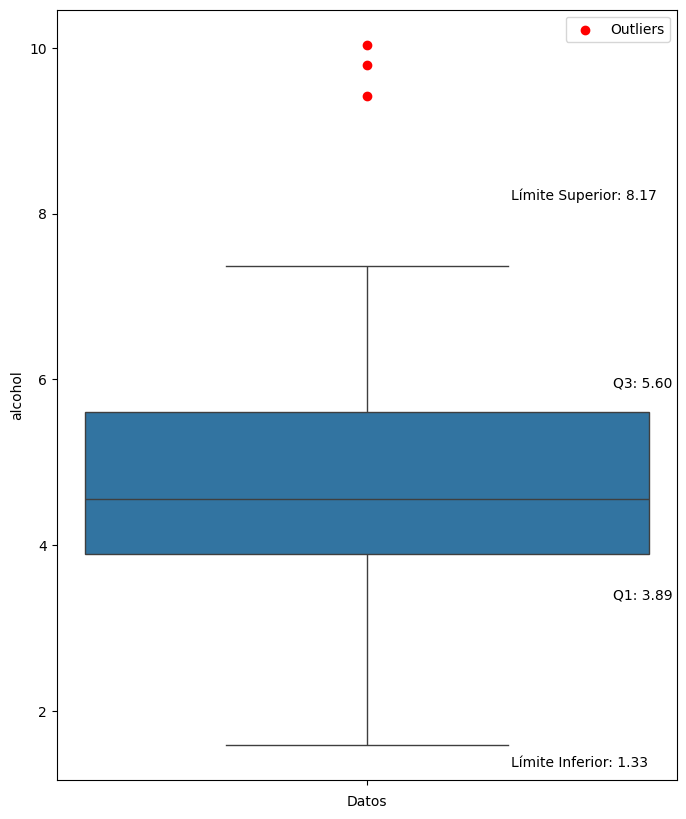

,total,speeding,alcohol,not_distracted,no_previous,ins_premium,ins_losses,abbrev
26,21.4,8.346,9.416,17.976,18.190,816.21,85.15,MT
34,23.9,5.497,10.038,23.661,20.554,688.75,109.72,ND
40,23.9,9.082,9.799,22.944,19.359,858.97,116.29,SC


In [39]:
plot_boxplot_with_outliers(df, 'alcohol', outlier_color='red', factor=1.5)

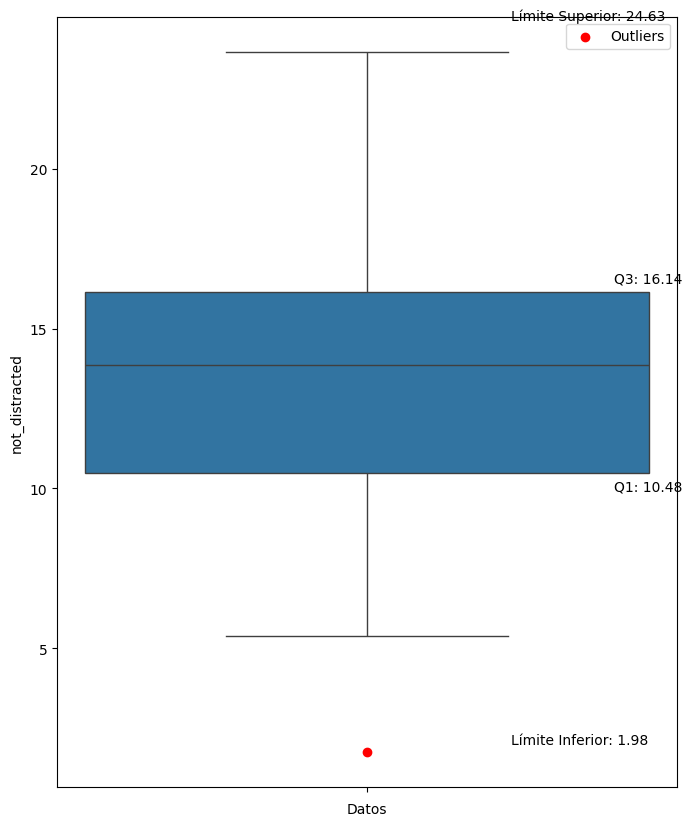

,total,speeding,alcohol,not_distracted,no_previous,ins_premium,ins_losses,abbrev
24,17.6,2.64,5.456,1.76,17.6,896.07,155.77,MS


In [41]:
plot_boxplot_with_outliers(df, 'not_distracted', outlier_color='red', factor=1.5)

#### 2. Z Score

In [49]:
def detect_outliers_zscore(data, threshold=2):
    # Calcular el Z-score para cada punto de datos
    z_scores = (data - np.mean(data)) / np.std(data)

    # Encontrar valores atípicos basados en el umbral
    outliers = np.abs(z_scores) > threshold

    return outliers

In [45]:
def plot_outliers(data, outliers):
    # Crear un gráfico de dispersión para los valores normales
    plt.figure(figsize=(10, 6))
    plt.scatter(data[~outliers], [1] * len(data[~outliers]), label='Valores Normales', color='blue', s=50)

    # Crear un gráfico de dispersión para los valores atípicos
    plt.scatter(data[outliers], [1] * len(data[outliers]), label='Valores Atípicos', color='red', marker='x', s=100)

    plt.title('Detección de Outliers con Z-score (tresh=2)')
    plt.xlabel('Datos')
    plt.yticks([])
    plt.legend()
    plt.grid(True)
    plt.show()


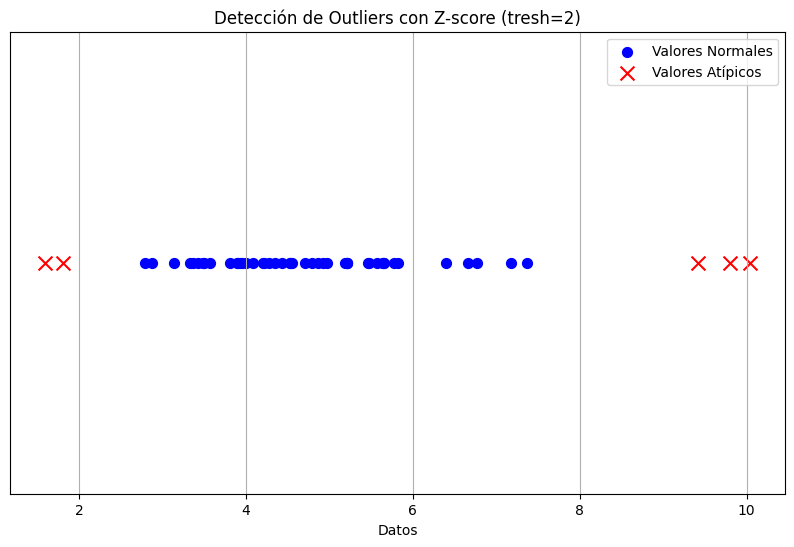

In [52]:
outliers = detect_outliers_zscore(df['alcohol'], threshold=1.5)
plot_outliers(df['alcohol'], outliers)

### Correlaciones

#### 1. Pearson (Numérica vs Numérica)

In [53]:
# Cargar un DataFrame de ejemplo desde Seaborn
df = sns.load_dataset('diamonds')
print(df.shape)
df.head()

(53940, 10)


,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [67]:
def plot_lmplot_with_pearson(dataframe, variable1, variable2):
    # Calcula la correlación de Pearson
    corr = dataframe[variable1].corr(dataframe[variable2])

    # Crea el gráfico de dispersión con una recta de regresión lineal
    sns.lmplot(x=variable1, y=variable2, data=dataframe,line_kws={'color': 'red'})

    # Anota la correlación en el gráfico
    plt.text(0.1, 0.9, f'Correlación de Pearson: {corr:.2f}', transform=plt.gca().transAxes, fontsize=12)

    # Muestra el gráfico
    plt.show()

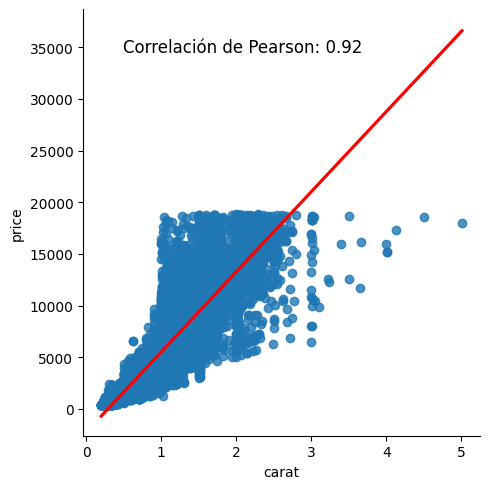

In [68]:
plot_lmplot_with_pearson(df, 'carat', 'price')

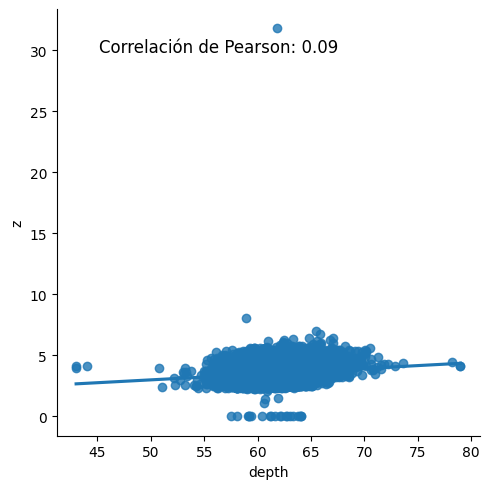

In [66]:
plot_lmplot_with_pearson(df, 'depth', 'z')

#### 2. Chi Cuadrado (Categórica vs categórica)

In [69]:
data = {
    'Género': ['Masculino', 'Masculino', 'Femenino', 'Femenino'],
    'Preferencia': ['Acción', 'Romance', 'Acción', 'Romance'],
    'Frecuencia': [12, 8, 5, 15]
}

df = pd.DataFrame(data)
df

,Género,Preferencia,Frecuencia
0,Masculino,Acción,12
1,Masculino,Romance,8
2,Femenino,Acción,5
3,Femenino,Romance,15


In [31]:
tabla_contingencia = pd.crosstab(df['Género'], df['Preferencia'], df['Frecuencia'], aggfunc='sum')
tabla_contingencia

Preferencia,Acción,Romance
Género,,
Femenino,5,15
Masculino,12,8


In [32]:
tabla_contingencia.sum(axis=1)

,0
Género,
Femenino,20
Masculino,20


In [33]:
tabla_contingencia.sum(axis=0)

,0
Preferencia,
Acción,17
Romance,23


In [35]:
tabla_contingencia.values.sum()

40

In [34]:
expected_data = np.outer(tabla_contingencia.sum(axis=1),
                         tabla_contingencia.sum(axis=0))
expected_data

array([[340, 460],
       [340, 460]])

In [36]:
# Paso 1: Calcular la tabla de contingencia
tabla_contingencia = pd.crosstab(df['Género'], df['Preferencia'], df['Frecuencia'], aggfunc='sum')

# Paso 2: Calcular las frecuencias esperadas
expected_data = np.outer(tabla_contingencia.sum(axis=1),
                         tabla_contingencia.sum(axis=0)) / tabla_contingencia.values.sum()
expected_data = pd.DataFrame(expected_data, index=['Femenino', 'Masculino'], columns=['Acción', 'Romance'])


expected_data.head()

,Acción,Romance
Femenino,8.5,11.5
Masculino,8.5,11.5


In [70]:
# Paso 3: Calcular la estadística de chi-cuadrado # Aca se puede aplicar un factor de correcion
chi_squared_statistic = (tabla_contingencia - expected_data)**2 / expected_data
chi_squared = chi_squared_statistic.sum().sum()

print(chi_squared)

# Paso 4: Calcular los grados de libertad
degrees_of_freedom = (tabla_contingencia.shape[0] - 1) * (tabla_contingencia.shape[1] - 1)

# Paso 5: Calcular el valor p
p_value = 1 - chi2.cdf(chi_squared, degrees_of_freedom)

print(p_value)
# Paso 6: Realizar la prueba de hipótesis
alpha = 0.05  # Nivel de significancia
if p_value < alpha:
    conclusion = "Se rechaza la hipótesis nula, hay una asociación significativa."
else:
    conclusion = "No se rechaza la hipótesis nula, no hay evidencia de asociación significativa."

5.012787723785166
0.025160759200408833


In [71]:
# Imprimir resultados
print(f"Tabla de contingencia:\n{tabla_contingencia}\n")
print(f"Frecuencias esperadas:\n{expected_data}\n")
print(f"Tabla de chi cuadrado:\n{chi_squared_statistic}\n")
print(f"Estadística de chi-cuadrado: {chi_squared}\n")
print(f"Grados de libertad: {degrees_of_freedom}\n")
print(f"Valor p: {p_value}\n")
print(f"Conclusión: {conclusion}")

Tabla de contingencia:
Preferencia  Acción  Romance
Género                      
Femenino          5       15
Masculino        12        8

Frecuencias esperadas:
           Acción  Romance
Femenino      8.5     11.5
Masculino     8.5     11.5

Tabla de chi cuadrado:
Preferencia    Acción   Romance
Género                         
Femenino     1.441176  1.065217
Masculino    1.441176  1.065217

Estadística de chi-cuadrado: 5.012787723785166

Grados de libertad: 1

Valor p: 0.025160759200408833

Conclusión: Se rechaza la hipótesis nula, hay una asociación significativa.


In [72]:
chi2_stat, p, _, _ = chi2_contingency(tabla_contingencia, correction=False)

print(f"Valor de Chi-cuadrado: {chi2_stat}")
print(f"Valor p: {p}")

Valor de Chi-cuadrado: 5.012787723785166
Valor p: 0.025160759200408785


#### 3. Test de ANOVA (Numérica vs Categórica)

In [73]:
# Cargar el conjunto de datos de muestra de Seaborn
data = sns.load_dataset("tips")
data.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [78]:
# Agrupar los datos por día
grouped_data = [data['total_bill'][data['sex'] == sex] for sex in data['sex'].unique()]
type(grouped_data)
print(grouped_data)

[0      16.99
4      24.59
11     35.26
14     14.83
16     10.33
       ...  
226    10.09
229    22.12
238    35.83
240    27.18
243    18.78
Name: total_bill, Length: 87, dtype: float64, 1      10.34
2      21.01
3      23.68
5      25.29
6       8.77
       ...  
236    12.60
237    32.83
239    29.03
241    22.67
242    17.82
Name: total_bill, Length: 157, dtype: float64]


In [79]:
print(*grouped_data)

0      16.99
4      24.59
11     35.26
14     14.83
16     10.33
       ...  
226    10.09
229    22.12
238    35.83
240    27.18
243    18.78
Name: total_bill, Length: 87, dtype: float64 1      10.34
2      21.01
3      23.68
5      25.29
6       8.77
       ...  
236    12.60
237    32.83
239    29.03
241    22.67
242    17.82
Name: total_bill, Length: 157, dtype: float64


In [80]:
type(*grouped_data)

TypeError: type() takes 1 or 3 arguments

5.188345638458361
0.023611666846859697
El test de ANOVA es significativo, al menos un grupo es diferente.


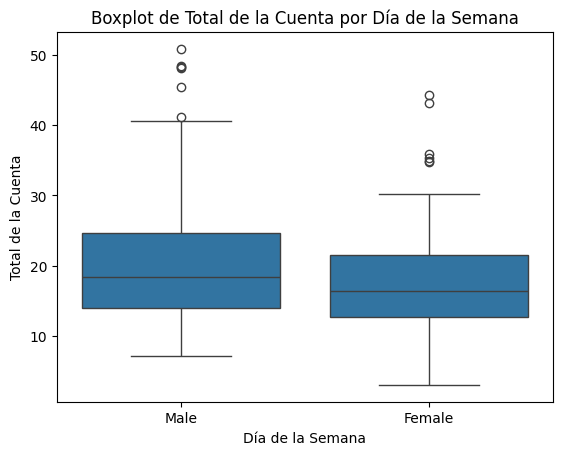

In [82]:

# Realizar el test de ANOVA
statistic, p_value = stats.f_oneway(*grouped_data)

print(statistic)
print(p_value)
# Imprimir el resultado del test
alpha = 0.05
if p_value < alpha:
    print("El test de ANOVA es significativo, al menos un grupo es diferente.")
else:
    print("No hay evidencia suficiente para rechazar la hipótesis nula.")

# Graficar los datos con un boxplot
sns.boxplot(x='sex', y='total_bill', data=data)
plt.xlabel('Día de la Semana')
plt.ylabel('Total de la Cuenta')
plt.title('Boxplot de Total de la Cuenta por Día de la Semana')
plt.show()

El test de ANOVA es significativo, al menos un grupo es diferente.


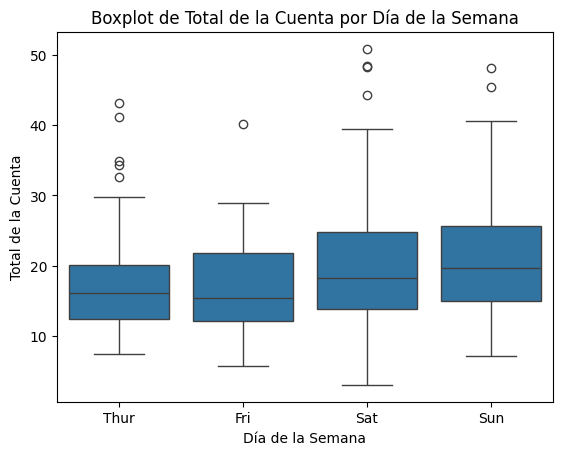

In [84]:
# Agrupar los datos por día
grouped_data = [data['total_bill'][data['day'] == day] for day in data['day'].unique()]

# Realizar el test de ANOVA
statistic, p_value = stats.f_oneway(*grouped_data)

# Imprimir el resultado del test
alpha = 0.05
if p_value < alpha:
    print("El test de ANOVA es significativo, al menos un grupo es diferente.")
else:
    print("No hay evidencia suficiente para rechazar la hipótesis nula.")

# Graficar los datos con un boxplot
sns.boxplot(x='day', y='total_bill', data=data)
plt.xlabel('Día de la Semana')
plt.ylabel('Total de la Cuenta')
plt.title('Boxplot de Total de la Cuenta por Día de la Semana')
plt.show()

<center><strong>¡Ahora podemos regresar a la presentación</center></strong>

## Selección de Características

In [86]:
from sklearn.datasets import load_wine
import warnings

from sklearn.feature_selection import SequentialFeatureSelector
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LassoCV

warnings.filterwarnings('ignore')

wine = load_wine()
data = pd.DataFrame(data=wine.data, columns=wine.feature_names)
target = wine.target
data.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0


In [88]:
target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2])

### 1. Forward Selection

In [87]:
# Crear un modelo base (por ejemplo, Regresión Logística)
base_model = LogisticRegression()

# Utilizar Forward Selection para seleccionar características
sfs = SequentialFeatureSelector(base_model, n_features_to_select=3, direction='forward', scoring='accuracy', cv=5)
sfs.fit(data, target)
selected_features = data.columns[sfs.support_]
print("Características seleccionadas por Forward Selection:")
print(selected_features)

Características seleccionadas por Forward Selection:
Index(['alcohol', 'alcalinity_of_ash', 'flavanoids'], dtype='object')


### 2. Filtro por Correlaciones

In [89]:
# Calcular matriz de correlación
correlation_matrix = data.corr().abs()

# Crear máscara para seleccionar características altamente correlacionadas
upper = correlation_matrix.where(np.triu(np.ones(correlation_matrix.shape), k=1).astype(bool))
to_drop = [column for column in upper.columns if any(upper[column] > 0.7)]

# Eliminar características altamente correlacionadas
filtered_data = data.drop(to_drop, axis=1)
print("Características después del filtrado por correlaciones:")
print(filtered_data.columns)

Características después del filtrado por correlaciones:
Index(['alcohol', 'malic_acid', 'ash', 'alcalinity_of_ash', 'magnesium',
       'total_phenols', 'nonflavanoid_phenols', 'proanthocyanins',
       'color_intensity', 'hue', 'proline'],
      dtype='object')


### 3. Selección por Lasso

In [29]:
# Usar LassoCV para seleccionar características
lasso_model = LassoCV(alphas=[0.001, 0.01, 0.1, 1.0])
lasso_model.fit(data, target)
lasso_coefs = lasso_model.coef_
selected_features_lasso = data.columns[lasso_coefs != 0]
print("Características seleccionadas por Lasso:")
print(selected_features_lasso)

Características seleccionadas por Lasso:
Index(['alcohol', 'malic_acid', 'alcalinity_of_ash', 'flavanoids',
       'color_intensity', 'od280/od315_of_diluted_wines', 'proline'],
      dtype='object')
